In [1]:
# import Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load The file

In [2]:
# 1.Load the data file using pandas. 
df = pd.read_csv('googleplaystore.csv')


In [3]:
df.head()                                     #  sample of dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

# 2. Data Cleansing And Data Preprocessing

In [5]:
#2.Check for null values in the data. Get the number of null values for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Get the number of null values for each column.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# 3. Drop records with nulls in any of the columns. 
df.dropna(axis=0,inplace=True) 

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
# 4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them:
# 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

def change(Size):
    if 'M'in Size:                                    # Extract the numeric value from the column
        x=Size[:-1]
        x=float(x)*1000                               # Multiply the value by 1,000, if size is mentioned in Mb
        return x
                                                      
    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else:  return None

In [10]:
df.Size=df.Size.map(change)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [12]:
print(df.Size.isnull().sum())                       # 1637 Size records have null values 
df.Size.fillna(method='pad',inplace=True)           # missing value filled by na
print(df.Size.isnull().sum())

1637
0


In [13]:
# print(df['Size'])

In [14]:
# df.head()

In [15]:
# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)
df.Reviews=df.Reviews.astype('int64')
df.dtypes['Reviews']


dtype('int64')

In [16]:
# 4.3 Installs field is currently stored as string and has values like 1,000,000+. 
#4.3.1 Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer
df.Installs=df.Installs.map(lambda x:x.replace(',','').replace('+',''))
# df.head()

In [17]:
# 4.3.2 Install field is currently stored as string convert it to integer.
df.Installs=df.Installs.astype('int64')
df.dtypes['Installs']

dtype('int64')

In [18]:
# 4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df.Price=df.Price.map(lambda x:x.replace('$',''))


In [19]:
# Price field is stored as string convert it to numeric.
df.Price=df.Price.astype('float')
df.dtypes['Price']



dtype('float64')

# 5. Sanity checks:

In [20]:
# 5. Sanity checks:
# 5.1.	Average rating should be between 1 and 5 as only these values are allowed on the play store. 
# Drop the rows that have a value outside this range.
print(len(df[df.Rating>5]))

0


In [21]:
#5.2.	Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them
print(len(df[df.Reviews>df.Installs]))

7


In [22]:
indexNames = df[df.Reviews>df.Installs].index   
df.drop(indexNames , inplace=True)                   # using drop function we dropped records which have Reviews more than installs
print(len(df[df.Reviews>df.Installs]))

0


In [23]:
df=df[df.Reviews<df.Installs].copy()

In [24]:
df.shape

(9351, 13)

In [25]:
# 5.3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.
print(len(df[(df.Type=='free') & (df.Price> 0)]))        # check for condition - apps are free and price is greater than 0
                                                        # and if such record found we can drop that rows.


0


In [26]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# Data Visualization

### 6. Performing univariate analysis: 

In [27]:
# 6. Performing univariate analysis: 
# 6.1	Boxplot for Price
#	Are there any outliers? Think about the price of usual apps on Play Store.
# 6.2	Boxplot for Reviews
#	Are there any apps with very high number of reviews? Do the values seem right?
# 6.3	Histogram for Rating
#	How are the ratings distributed? Is it more toward higher ratings?
# 6.4	Histogram for Size





count    9351.000000
mean        0.961673
std        15.829226
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

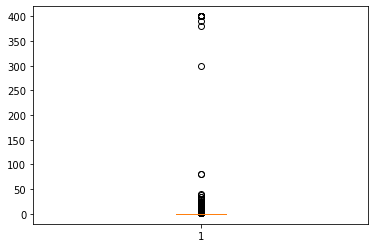

In [28]:
# 6.1	Boxplot for Price.
plt.boxplot(df['Price'])
df.Price.describe()


In [29]:
def outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    print("Q1 value is: ",Q1)
    print("Q3 value is: ",Q3)
    IQR = Q3 - Q1
    lr = Q1 -(1.5*IQR)
    ur = Q3 +(1.5*IQR)
    print("lower range of outliers: ",lr)
    print("upper range of outliers: ",ur)
    return lr,ur
            

In [30]:
lower_range,upper_range=outlier(df['Price'])

Q1 value is:  0.0
Q3 value is:  0.0
lower range of outliers:  0.0
upper range of outliers:  0.0


In [31]:
extreme_outliers = df[(df.Price < lower_range) | (df.Price >upper_range)]
print(extreme_outliers)    
# Are there any outliers? Think about the price of usual apps on Play Store.
# There are 642 outliers. most of the Apps are free.Price: From the box plot, it seems like there are some apps with very higher price. 

                                                 App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
290    TurboScan: scan documents and receipts in PDF            BUSINESS   
291                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
...                                              ...                 ...   
10682                            Fruit Ninja Classic                GAME   
10690                                       FO Bixby     PERSONALIZATION   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   

       Rating  Reviews     Size  Installs  Type  Price Content Rating  \
234       4.7 

{'whiskers': [<matplotlib.lines.Line2D at 0x1d36b368670>,
 'caps': [<matplotlib.lines.Line2D at 0x1d36b368d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d36b368310>],
 'medians': [<matplotlib.lines.Line2D at 0x1d36b373430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d36b373790>],
 'means': []}

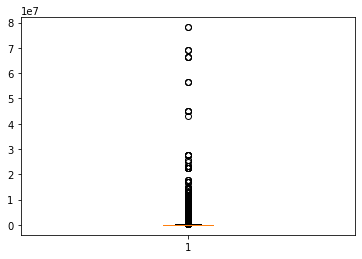

In [32]:
# 6.2	Boxplot for Reviews
plt.boxplot(df['Reviews'])

In [33]:
df.Reviews.describe()

count    9.351000e+03
mean     5.148707e+05
std      3.146496e+06
min      1.000000e+00
25%      1.880000e+02
50%      5.968000e+03
75%      8.187600e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [34]:
def outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    print("Q1 value is: ",Q1)
    print("Q3 value is: ",Q3)
    IQR = Q3 - Q1
    lr = Q1 -(1.5*IQR)
    ur = Q3 +(1.5*IQR)
    print("lower range of outliers: ",lr)
    print("upper range of outliers: ",ur)
    return lr,ur
            

In [35]:
lower_range,upper_range=outlier(df['Reviews'])

Q1 value is:  188.0
Q3 value is:  81876.0
lower range of outliers:  -122344.0
upper range of outliers:  204408.0


In [36]:
extreme = df[(df.Reviews < lower_range) | (df.Reviews >upper_range)]
#print(extreme)           # here  1634 Apps are have's high number of reviews
#  Are there any apps with very high number of reviews?
print(extreme.App )        # list of Apps having higher Review

3                                Sketch - Draw & Paint
19                                        ibis Paint X
42                          Textgram - write on photos
72       Android Auto - Maps, Media, Messaging & Voice
139                               Wattpad 📖 Free Books
                             ...                      
10740                                       PhotoFunia
10781                             Modern Strike Online
10784                                       Big Hunter
10809            Castle Clash: RPG War and Strategy FR
10840    iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 1634, dtype: object


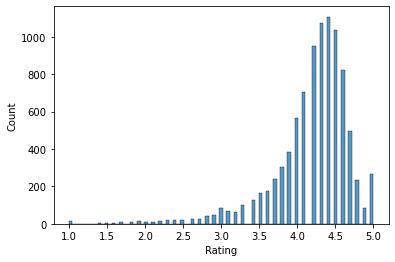

In [37]:
# 6.3	Histogram for Rating
#	How are the ratings distributed? Is it more toward higher ratings?
sns.histplot(data=df, x="Rating")
plt.show()

C:\Anacondas 3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

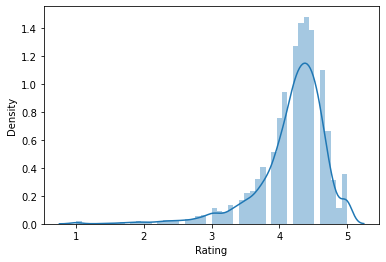

In [38]:
sns.distplot(df['Rating'])
# How are the ratings distributed? Is it more toward higher ratings?
# Rating is distributed as'Negative skewed distribution'. And is it more toward higher ratings.

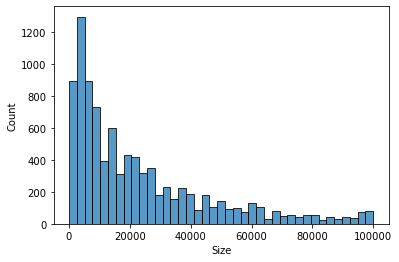

In [39]:
# Histogram for Size.
sns.histplot(data=df, x="Size")
plt.show()

# 7. Outlier treatment: 

In [40]:
# 7. Outlier treatment: 
# 7.1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
# 1.	Check out the records with very high price
# 2.	Is 200 indeed a high price?
# 3.	Drop these as most seem to be junk apps
# 7.2.	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
# 7.3.	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
# 1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
# 2.	Decide a threshold as cutoff for outlier and drop records having values more than that

In [41]:
# Check out the records with very high price
print(df.Price.max())
print(len(df[df.Price>=200]))
#--> there are 15 Apps with higher price.
# Is 200 indeed a high price?
#-->from the box plot,it seems that most of the applictions are free,and some apps are of less Price. 
# as compared with them $200 is high price.





400.0
15


In [42]:
df.shape

(9351, 13)

In [43]:
# Drop these as most seem to be junk apps
indexnames = df[df.Price>200].index 
print(indexnames)

df.drop(indexnames , inplace=True)                # using drop function we dropped records which havePrice more than $200.
df.shape


Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')


(9336, 13)

In [44]:
# 7.2.	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. 
#Drop records having more than 2 million reviews.
indexnames1 = df[df.Reviews > 2000000].index
indexnames1
df.drop(indexnames1 , inplace=True) 
df.shape

(8883, 13)

In [45]:
# 7.3.	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
# 1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
# 2.	Decide a threshold as cutoff for outlier and drop records having values more than that
print(df.Installs.quantile([.25,.50,.75,.90,.99]))       #Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
print(len(df[df.Installs>= 10000000]))
indexnames2 = df[df.Installs > 10000000].index           #Decide a threshold as cutoff for outlier and drop records having values more than that
print(indexnames2)
df.drop(indexnames2 , inplace=True) 
df.shape


0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64
1627
Int64Index([    3,   143,   152,   188,   192,   194,   201,   225,   292,
              293,
            ...
            10196, 10200, 10253, 10378, 10408, 10429, 10513, 10549, 10647,
            10707],
           dtype='int64', length=389)


(8494, 13)

# 8. Bivariate analysis: 

C:\Anacondas 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


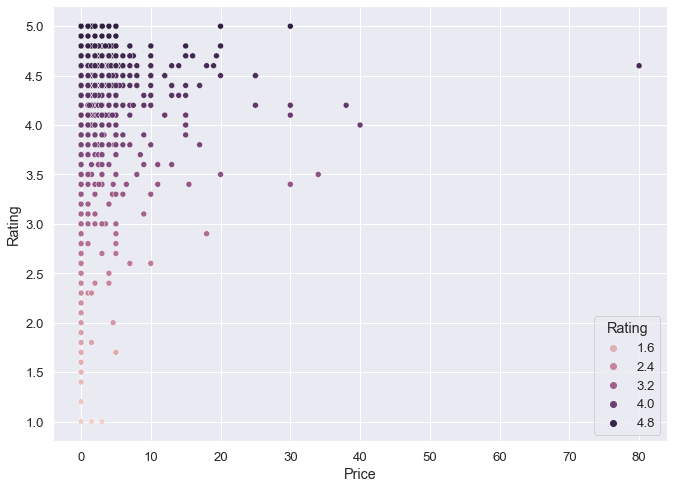

In [46]:
# Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.
# 8.1.	Make scatter plot/joinplot for Rating vs. Price
# 1.	What pattern do you observe? Does rating increase with price?
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(df.Price,df.Rating,hue=df.Rating)

plt.show()



1.	What pattern do you observe? Does rating increase with price?
It seem's  from pattern that Rating increases with increasing Price. Although, there are not a lot of apps which are high priced.

C:\Anacondas 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


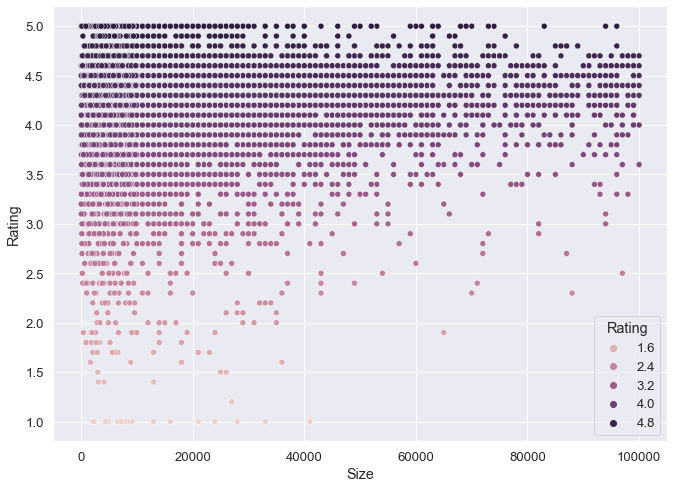

In [47]:
# 8.2.	Make scatter plot/joinplot for Rating vs. Size
# 1.	Are heavier apps rated better?
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(df.Size,df.Rating,hue=df.Rating)

plt.show()


1.	Are heavier apps rated better?
from the scatter plot it is observed that App's having heavier size rated better.

C:\Anacondas 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


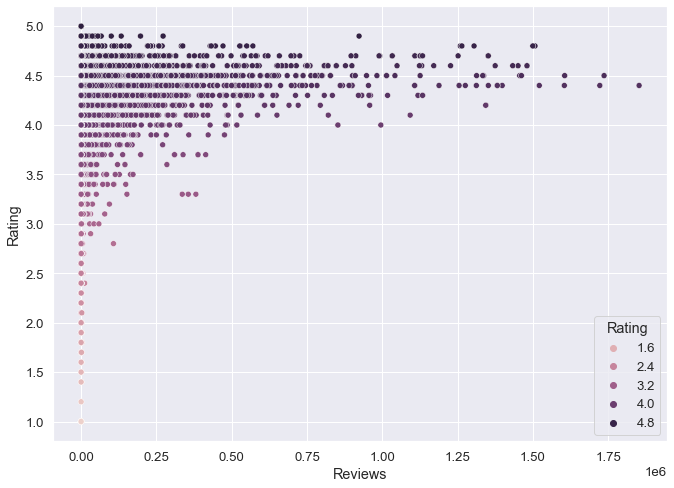

In [48]:
# 8.3.	Make scatter plot/joinplot for Rating vs. Reviews
# 1.	Does more review mean a better rating always?
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(df.Reviews,df.Rating,hue=df.Rating)

plt.show()



 1.	Does more review mean a better rating always?
from the above scatterplot it seem's that maximum  Rated app's have more Reviews.But for some poor rated apps there are maximum Reviews.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

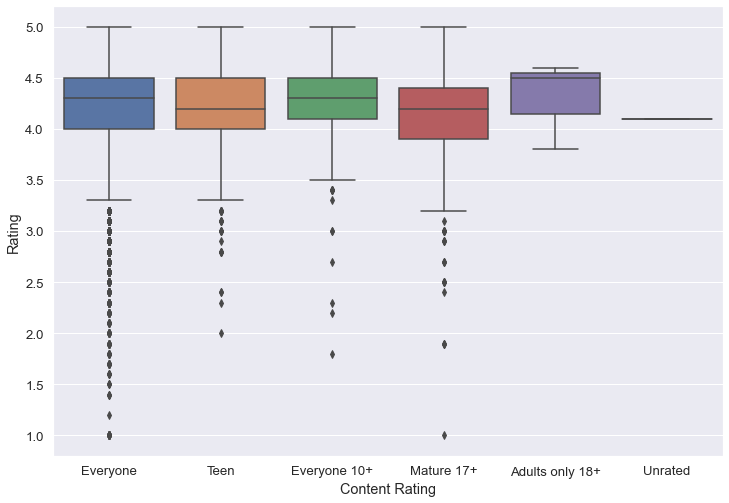

In [49]:
# 8.4.	Make boxplot for Rating vs. Content Rating
# 1.	Is there any difference in the ratings? Are some types liked better?

plt.figure(figsize=(12,8.27))
sns.boxplot(x = 'Content Rating', y = 'Rating', data = df)

 1.	Is there any difference in the ratings? Are some types liked better?
  The median rating for all others age group is similar, while the rating for “Adults Only 18+” is the highest.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

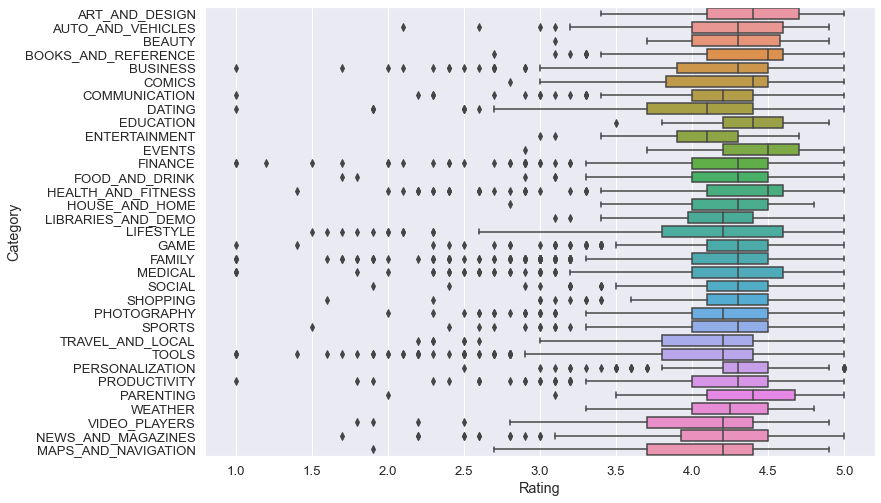

In [50]:
# 8.5.	Make boxplot for Ratings vs. Category
# 1.	Which genre has the best ratings?
plt.figure(figsize=(12,8.27))
sns.boxplot(x = 'Rating', y = 'Category', data = df)


 1. Which genre has the best ratings?
 Apps around Health & Fitness, Books and Reference, Events, Education and Art & design seem to have the highest median ratings.

# 9. Data preprocessing

C:\Anacondas 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

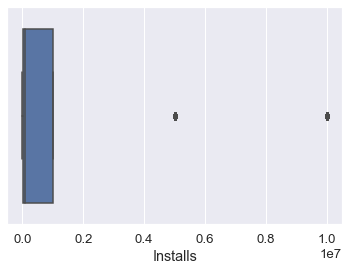

In [51]:
#For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
# 9.1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

inp1 = df.copy(deep=True)
sns.boxplot(inp1.Installs)


In [52]:
inp1.Installs = inp1.Installs.apply(func=np.log1p)


C:\Anacondas 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs'>

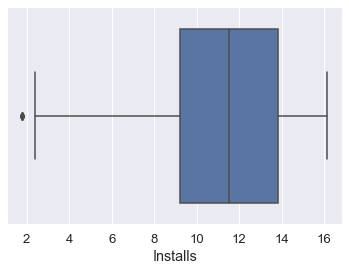

In [53]:
sns.boxplot(inp1.Installs)

C:\Anacondas 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

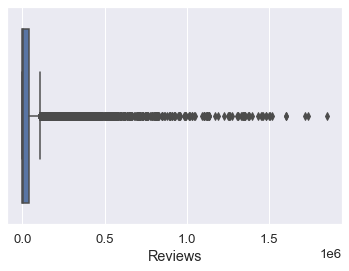

In [54]:
sns.boxplot(inp1.Reviews)


In [55]:
inp1.Reviews = inp1.Reviews.apply(func=np.log1p)


C:\Anacondas 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

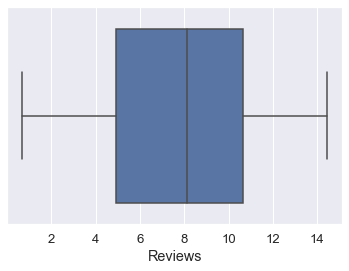

In [56]:
sns.boxplot(inp1.Reviews)

In [57]:
# 9.2.	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
print(inp1.shape)
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)



(8494, 13)


In [58]:
# print(inp1.shape)

In [59]:
# 9.3.	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.
inp2 = inp1.copy(deep=True)

In [60]:
inp2=pd.get_dummies(inp2,drop_first=True)
print(inp2.columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)


# 10. Train test split

In [61]:
# 10. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
inp2.shape

(8494, 157)

In [62]:
inp2.corr()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
Rating,1.000000,0.179926,0.062585,0.079293,0.025063,0.003000,0.013932,0.046046,-0.018955,-0.002811,...,-0.084720,0.006653,-0.026464,-0.001491,-0.016002,-0.036550,-0.002109,-0.006110,0.009953,0.026380
Reviews,0.179926,1.000000,0.287488,0.948696,-0.105474,-0.031310,-0.027386,-0.021102,-0.084289,-0.001648,...,-0.070948,0.015670,0.017185,-0.003098,-0.013494,0.011610,0.018759,0.019382,0.039965,0.036375
Size,0.062585,0.287488,1.000000,0.252657,0.002513,-0.004743,-0.022344,-0.048459,-0.055880,-0.021004,...,-0.172398,-0.008895,0.025673,-0.006948,-0.009812,-0.032238,0.000779,0.006297,-0.027044,0.030359
Installs,0.079293,0.948696,0.252657,1.000000,-0.163422,-0.019283,-0.012103,-0.017911,-0.079334,-0.002856,...,-0.049429,0.013854,0.032901,-0.000621,-0.015374,0.020659,0.016512,0.022740,0.039584,0.028626
Price,0.025063,-0.105474,0.002513,-0.163422,1.000000,-0.013889,-0.011362,-0.014287,-0.009331,-0.013364,...,-0.007308,-0.001749,-0.012588,-0.001749,-0.009102,-0.015960,-0.002473,-0.003030,0.002185,-0.008757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Genres_Video Players & Editors,-0.036550,0.011610,-0.032238,0.020659,-0.015960,-0.011743,-0.008891,-0.018078,-0.023839,-0.010458,...,-0.036968,-0.001369,-0.019785,-0.001369,-0.007122,1.000000,-0.001936,-0.002371,-0.011497,-0.006853
Genres_Video Players & Editors;Creativity,-0.002109,0.018759,0.000779,0.016512,-0.002473,-0.001429,-0.001082,-0.002200,-0.002901,-0.001272,...,-0.004498,-0.000167,-0.002407,-0.000167,-0.000867,-0.001936,1.000000,-0.000288,-0.001399,-0.000834
Genres_Video Players & Editors;Music & Video,-0.006110,0.019382,0.006297,0.022740,-0.003030,-0.001750,-0.001325,-0.002694,-0.003553,-0.001559,...,-0.005509,-0.000204,-0.002949,-0.000204,-0.001061,-0.002371,-0.000288,1.000000,-0.001713,-0.001021
Genres_Weather,0.009953,0.039965,-0.027044,0.039584,0.002185,-0.008487,-0.006426,-0.013066,-0.017230,-0.007558,...,-0.026719,-0.000989,-0.014300,-0.000989,-0.005148,-0.011497,-0.001399,-0.001713,1.000000,-0.004953


In [63]:
X = inp2.iloc[:,1:]      # All columns except Rating
y = inp2.iloc[:,:1]      # Rating


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [65]:
# 11. Separate the dataframes into X_train, y_train, X_test, and y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 , random_state = 10)  # spliting data into 70% train & 30% test data

In [66]:
print(X_train.shape)              # shape = (row,column)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5945, 156)
(2549, 156)
(5945, 1)
(2549, 1)


In [67]:
#11 . Model building
# •	Use linear regression as the technique
# •	Report the R2 on the train set


# Linear Regression

In [68]:
lm = LinearRegression()

Model = lm.fit(X_train, y_train) # train data


In [69]:
# prediction on train data

pred_train = lm.predict(X_train)

In [70]:
y_train=np.array(y_train)
pred_train=np.array(pred_train)

df_train=pd.DataFrame({'Actual':y_train.flatten(),'Predicted':pred_train.flatten()})
df_train.head(10)

,Actual,Predicted
0,4.2,4.240458
1,4.0,3.929272
2,4.4,4.140487
3,4.5,4.112260
4,4.0,4.123477
5,4.3,4.261637
6,4.3,4.300000
7,4.2,4.229494
8,4.5,4.186869
9,4.7,4.605842


In [71]:
# Report the R2 on the train set
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Error = Actual - Prediction

# evaluate the train  data
# Actual = y_train
# Prediction = pred_train

mse_train = mean_squared_error(y_train, pred_train)
rmse_train = sqrt(mse_train)

print("Mean Square erorr for train data is :", mse_train)
print("Root Mean Square erorr for train data is :", rmse_train)


r2_train = r2_score(y_train, pred_train)
print('R2 value of model is :', r2_train)
print('Prediction Error Percentage is',round((0.50/np.mean(y_train))*100))

Mean Square erorr for train data is : 0.2362147863845811
Root Mean Square erorr for train data is : 0.4860193271718534
R2 value of model is : 0.16443746433153483
Prediction Error Percentage is 12


In [72]:
# 12. Make predictions on test set and report R2.

In [73]:
# prediction on Test data

pred_test = lm.predict(X_test)

In [74]:
y_test=np.array(y_test)
pred_test=np.array(pred_test)

df_test=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':pred_test.flatten()})
df_test.head(10)

,Actual,Predicted
0,3.8,4.133103
1,4.6,4.168533
2,4.4,4.722181
3,3.7,4.011642
4,4.3,4.329047
5,4.2,3.808435
6,4.4,4.119283
7,4.3,4.432461
8,4.5,3.995561
9,4.5,4.260185


In [75]:
# Evaluation of Model
from sklearn.metrics import mean_squared_error, r2_score

# Error = Actual - Prediction

# evaluate the test  data
# Actual = y_test
# Prediction = pred_test

mse_test = mean_squared_error(y_test, pred_test)
rmse_test = sqrt(mse_test)

print("Mean Square erorr for test data is :", mse_test)
print("Root Mean Square erorr for test data is :", rmse_test)


r2_test = r2_score(y_test, pred_test)
print('R2 value of model on test data is :', r2_test)
print('Prediction Error Percentage is',round((0.50/np.mean(y_test))*100))

Mean Square erorr for test data is : 0.24898519707885847
Root Mean Square erorr for test data is : 0.49898416515843314
R2 value of model on test data is : 0.1322129577017359
Prediction Error Percentage is 12
